In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import numpy.random as nprm
from qiskit.extensions import UnitaryGate

In [3]:
def make_unitary(n):
    v = []
    random = nprm.randint(2, size=n)
    for i in random:
        if i == 0:
            v.append(-1)
        else:
            v.append(1)
    uni_matrix = np.diag(v)
    return uni_matrix

In [7]:
def qc_composer(uni_matrix):
    qc = QuantumCircuit(2)
    if uni_matrix[0][0] == -1:
        qc.z(0)
        qc.z(1)
        qc.cz(0, 1)
        qc.rx(np.pi, 0)
        qc.rx(np.pi, 0)
    if uni_matrix[1][1] == -1:
        qc.z(1)
        qc.cz(0, 1)
    if uni_matrix[2][2] == -1:
        qc.z(0)
        qc.z(1)
        qc.z(0)
        qc.z(1)
        qc.cz(0, 1)
    if uni_matrix[3][3] == -1:
        qc.cz(0, 1)
    return qc

In [ ]:
def composer(matrix, n):
    if n > 2:
        qc = QuantumCircuit(n)
        sub_matrix1 = np.array([])
        sub_matrix2 = np.array([])
        for i in range(2**(n-1)):
            sub_matrix1 = np.append(sub_matrix1, np.array([int(matrix[i][i])]))
        for i in range(2**(n-1), 2**n):
            sub_matrix2 = np.append(sub_matrix2, np.array([int(matrix[i][i])]))
        sub_matrix1 = np.diag(sub_matrix1)
        sub_matrix2 = np.diag(sub_matrix2) 
        new_gate1 = composer(sub_matrix1, n-1).control(1)
        new_gate2 = composer(sub_matrix2, n-1).control(1)
        print(new_gate1)
        print(new_gate2)
        print(qc)
        qc = qc + new_gate1
        qc = qc + new_gate2
        return qc
    elif n == 2:
        qc = QuantumCircuit(n)
        qc.extend(qc_composer(matrix))
        return qc

/tmp/ipykernel_114/825720677.py:14: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc.extend(qc_composer(matrix))


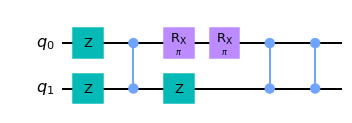

In [12]:
composer(make_unitary(4)).draw()